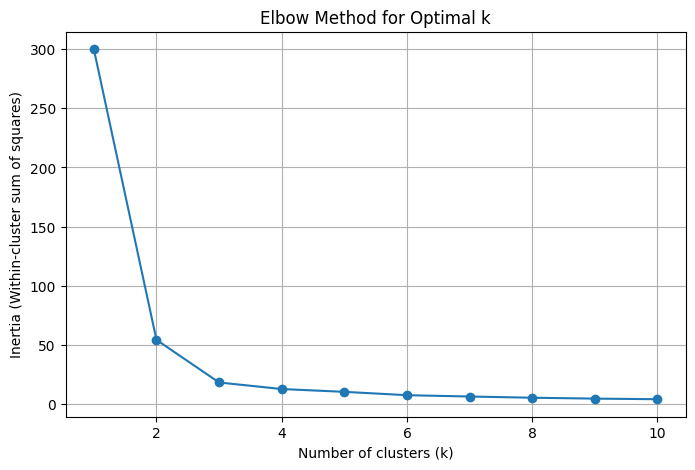

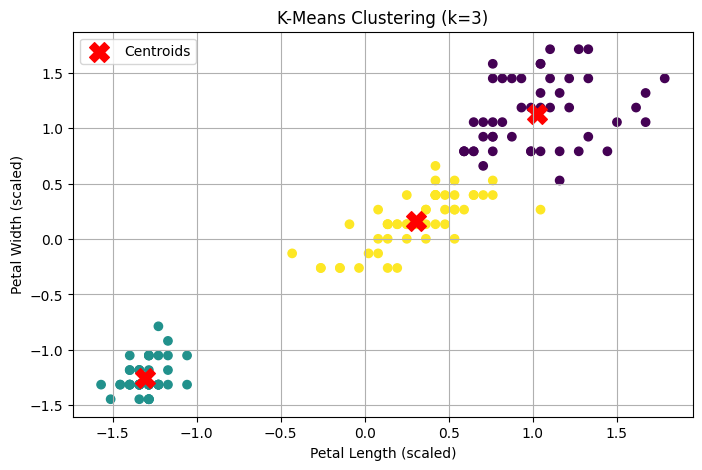

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/iris (2).csv")

# Use only petal length and petal width
X = df[["petal_length", "petal_width"]]

# Preprocessing: Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.grid(True)
plt.show()

# Optional: Choose k based on elbow (e.g., k=3), fit and visualize
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.legend()
plt.grid(True)
plt.show()
